#Exercise
This is a dataset related to how much money a person can get from a mortgage on his or her home. This dataset includes the following features:
* Gender: Gender of the borrower (including two values 'F' and 'M')
* Age: Age of the customer applying for a loan (including positive integer values)
* Income (USD): Customer's income in USD (value is a positive number)
* Income Stability: The level of customer's income stability (including three values of Low and High)
* Property Age: Life expectancy of the house in days (including positive integer values)
* Property Location: Location of the house (including 'Rural', 'Urban', and 'Semi-Urban')
* Property Price: The value of the house in USD (including positive real values)
* Loan Sanction Amount (USD): Amount that customers can borrow in USD (target value)

Based on practice sample #1, proceed:
1. Read data
2. Visualize some information of data
3. Normalize Data to train linear regression model
4. Train linear regression model and show the model's intercepts, coeficients
5. Learn on sklearn how to use Ridge, Lasso, and ElasticNet compare the error of all 3 algorithms with Linear Regression (https://scikit-learn.org/stable/index.html)
6. Let's try Polynomial of order 2 to compare the previous results. What will the result be if we choose the n order too high?


**Submission Link**: https://forms.gle/WKCJUp7noHAKALNP9 (Submit your .ipynb file)

In [1]:
# mount data from google drive to colab
#from google.colab import drive
#drive.mount('/content/drive')

#import library
import pandas as pd # pandas 
import numpy as np # numpy
import time
import matplotlib.pyplot as plt


# Prepare and Analyze Data

1. Load Dataset
2. Analyze Dataset
3. Preprocess data (type, null, missing, ...)
4. Feature Engineering

## Load Dataset

In [2]:
# read data using Pandas DataFrame
def read_dataset(path):
    # Todo: read_csv from a path and return a DataFrame
    df = pd.read_csv(path)
    display(df.head())
    display(df.describe())
    return df

In [3]:
path = "C:\\Users\\Phu\\OneDrive - VNU-HCMUS\\TH_ML\\Week 01\\final_house_loan.csv" # Path to your file

df = read_dataset(path)
#ToDo: Show histogram of dataframe

,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
0,F,19,1641.25,Low,1651.25,Rural,59641.82,21026.420753
1,M,29,1989.71,Low,1990.71,Urban,179858.51,60595.183366
2,F,37,1849.91,Low,1856.91,Rural,117297.62,39181.648002
3,M,65,2735.18,High,2747.18,Rural,354417.72,128497.710865
4,F,62,4741.78,High,4740.78,Urban,82049.80,39386.919336


,Age,Income (USD),Property Age,Property Price,Loan Sanction Amount (USD)
count,47297.000000,47265.000000,47263.000000,4.729700e+04,47297.000000
mean,40.000063,2586.684384,2586.611058,1.350880e+05,46487.229765
std,16.086128,1558.768809,1558.842286,9.457875e+04,32549.905634
min,18.000000,372.700000,370.700000,7.859620e+03,254.586578
25%,24.000000,1653.740000,1652.820000,6.250408e+04,21782.822159
50%,40.000000,2245.480000,2244.810000,1.130936e+05,38822.132402
75%,55.000000,3128.560000,3128.380000,1.819546e+05,62612.236905
max,65.000000,54662.750000,54647.750000,1.077967e+06,366131.165218


## Data Analysis

In [4]:
# Data analysis
# Todo: analyze your data here

In [5]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47297 entries, 0 to 47296
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      47297 non-null  object 
 1   Age                         47297 non-null  int64  
 2   Income (USD)                47265 non-null  float64
 3   Income Stability            47285 non-null  object 
 4   Property Age                47263 non-null  float64
 5   Property Location           47294 non-null  object 
 6   Property Price              47297 non-null  float64
 7   Loan Sanction Amount (USD)  47297 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 2.9+ MB
None


In [6]:
print(df.describe())


                Age  Income (USD)  Property Age  Property Price  \
count  47297.000000  47265.000000  47263.000000    4.729700e+04   
mean      40.000063   2586.684384   2586.611058    1.350880e+05   
std       16.086128   1558.768809   1558.842286    9.457875e+04   
min       18.000000    372.700000    370.700000    7.859620e+03   
25%       24.000000   1653.740000   1652.820000    6.250408e+04   
50%       40.000000   2245.480000   2244.810000    1.130936e+05   
75%       55.000000   3128.560000   3128.380000    1.819546e+05   
max       65.000000  54662.750000  54647.750000    1.077967e+06   

       Loan Sanction Amount (USD)  
count                47297.000000  
mean                 46487.229765  
std                  32549.905634  
min                    254.586578  
25%                  21782.822159  
50%                  38822.132402  
75%                  62612.236905  
max                 366131.165218  


### Plot histograms of the numerical features to see their distribution:


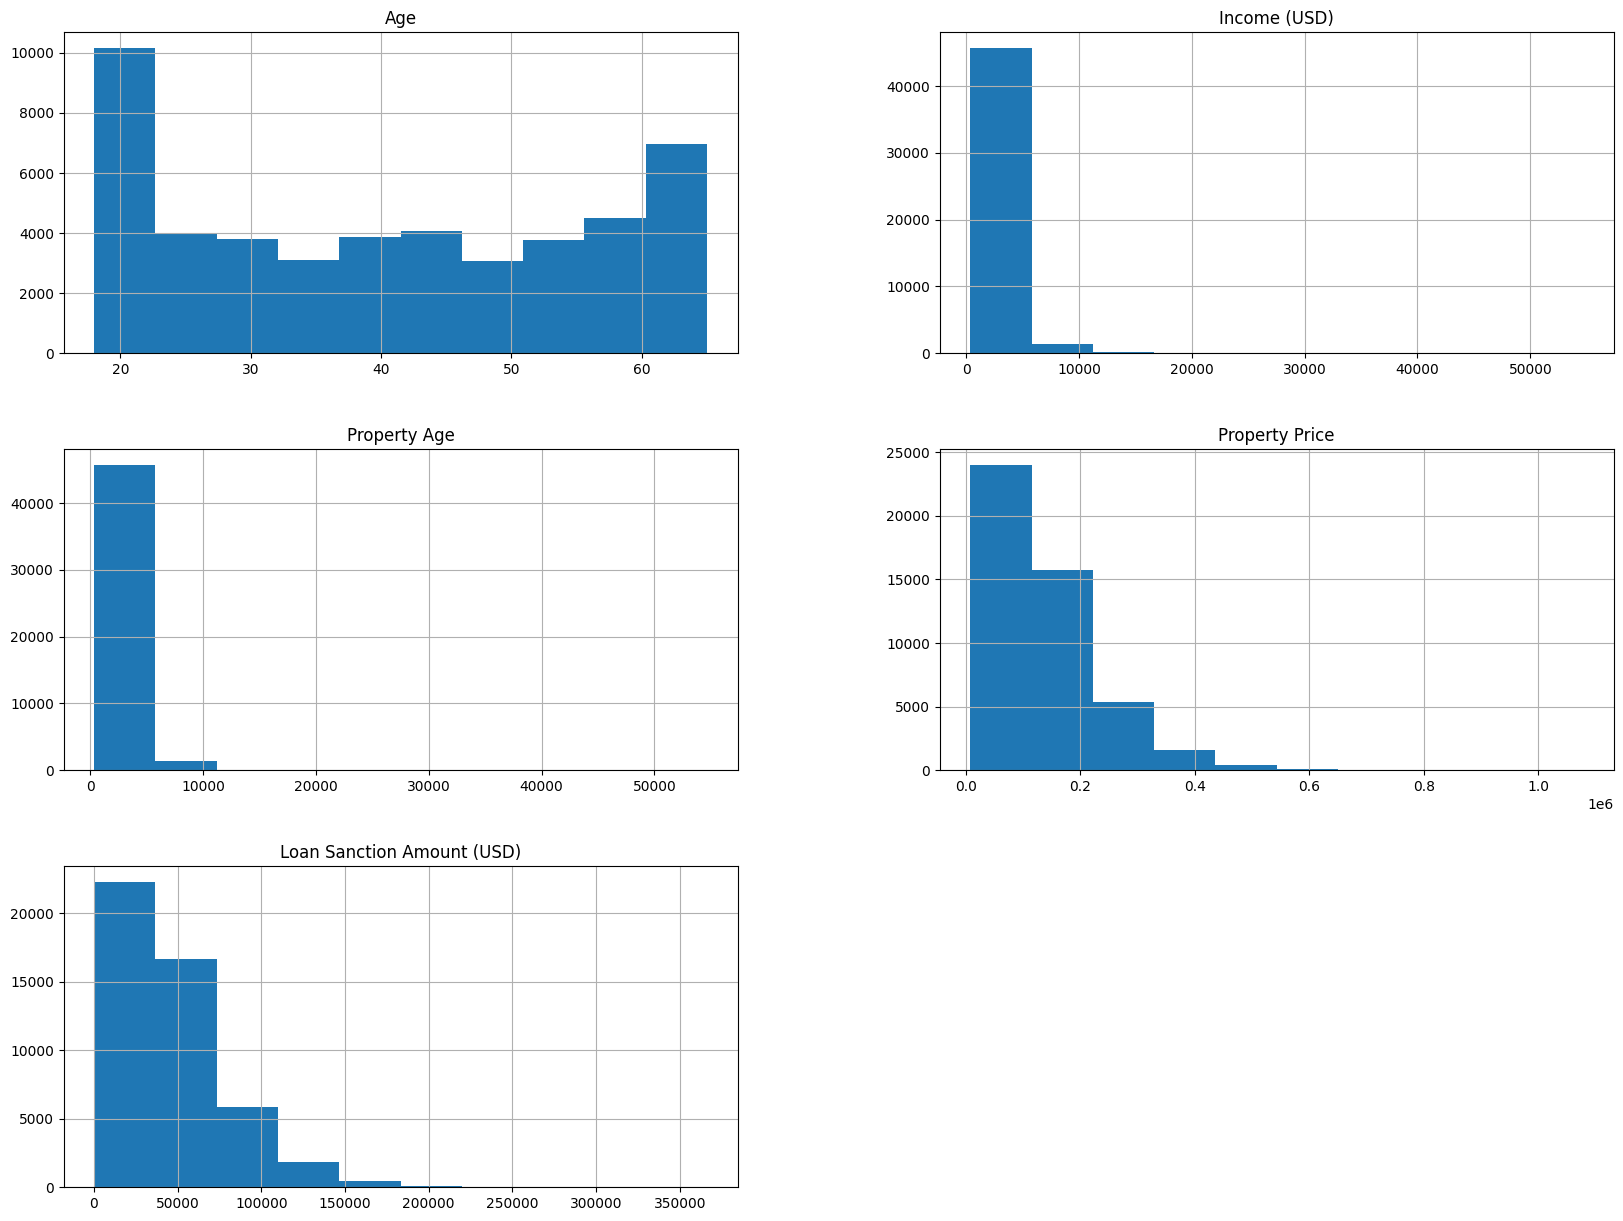

In [7]:
df.hist(bins=10, figsize=(20,15))
plt.show()


Create a correlation matrix to see the linear relationship between numerical features:


In [8]:
corr_matrix = df.corr()
print(corr_matrix)


                                 Age  Income (USD)  Property Age  \
Age                         1.000000     -0.044058     -0.044025   
Income (USD)               -0.044058      1.000000      0.999986   
Property Age               -0.044025      0.999986      1.000000   
Property Price             -0.003330      0.358041      0.358025   
Loan Sanction Amount (USD) -0.000319      0.392827      0.392806   

                            Property Price  Loan Sanction Amount (USD)  
Age                              -0.003330                   -0.000319  
Income (USD)                      0.358041                    0.392827  
Property Age                      0.358025                    0.392806  
Property Price                    1.000000                    0.994240  
Loan Sanction Amount (USD)        0.994240                    1.000000  


### Visualize the correlation matrix as a heatmap:


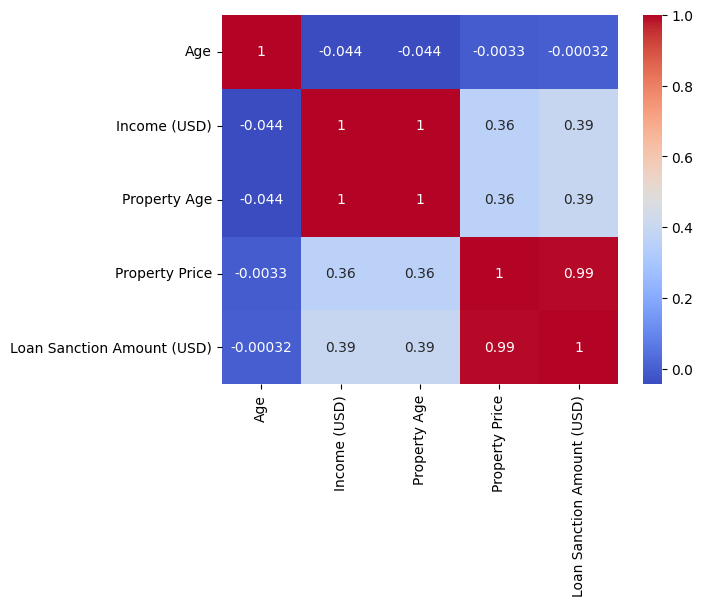

In [9]:
import seaborn as sns
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


## Preprocessing (Remove null or duplicated)

In [10]:
def preprocessing_data(df):
    # --- (Optional) Drop null datapoints or fill missing data
    # Keep your data the same if you dont want to customize it
    if df.isnull().values.any():
        df = df.dropna() # Drop null values
    if df.duplicated().values.any():
        df = df.drop_duplicates() # Drop duplicated rows    
    df = df
    return df

In [11]:
df = preprocessing_data(df.copy())

## Feature Engineering

In [12]:
print(df.dtypes)


Gender                         object
Age                             int64
Income (USD)                  float64
Income Stability               object
Property Age                  float64
Property Location              object
Property Price                float64
Loan Sanction Amount (USD)    float64
dtype: object


In [13]:
object_cols = df.select_dtypes(include='object').columns
# object = categorical for some time
#print(df.dtypes)

for col in object_cols:
    unique_values = df[col].unique()
    print(f"Unique values of {col}: {unique_values}")

Unique values of Gender: ['F' 'M']
Unique values of Income Stability: ['Low' 'High']
Unique values of Property Location: ['Rural' 'Urban' 'Semi-Urban']


In [14]:
def normalize_data(df):
    # ---- Method 3
    start_time = time.time()
    # data normalization
    normalized_data = df.copy()
    normalized_data["Gender"] = normalized_data["Gender"].astype("category").cat.codes
    normalized_data["Income Stability"] = normalized_data["Income Stability"].astype("category").cat.codes
    normalized_data["Property Location"] = normalized_data["Property Location"].astype("category").cat.codes

    display(normalized_data.head())
    display(normalized_data.corr())
    print("Running time", time.time() - start_time)
    return normalized_data


,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
0,0,19,1641.25,1,1651.25,0,59641.82,21026.420753
1,1,29,1989.71,1,1990.71,2,179858.51,60595.183366
2,0,37,1849.91,1,1856.91,0,117297.62,39181.648002
3,1,65,2735.18,0,2747.18,0,354417.72,128497.710865
4,0,62,4741.78,0,4740.78,2,82049.80,39386.919336


,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
Gender,1.000000,0.007706,-0.002445,-0.019000,-0.002512,0.009142,0.005931,0.003396
Age,0.007706,1.000000,-0.044086,-0.455855,-0.044085,-0.007770,-0.003274,-0.000115
Income (USD),-0.002445,-0.044086,1.000000,0.080961,0.999986,-0.000199,0.358110,0.392897
Income Stability,-0.019000,-0.455855,0.080961,1.000000,0.081008,-0.001959,0.004813,-0.070969
Property Age,-0.002512,-0.044085,0.999986,0.081008,1.000000,-0.000233,0.358110,0.392892
Property Location,0.009142,-0.007770,-0.000199,-0.001959,-0.000233,1.000000,-0.000898,-0.001988
Property Price,0.005931,-0.003274,0.358110,0.004813,0.358110,-0.000898,1.000000,0.994429
Loan Sanction Amount (USD),0.003396,-0.000115,0.392897,-0.070969,0.392892,-0.001988,0.994429,1.000000


Running time 0.021925926208496094


<AxesSubplot:>

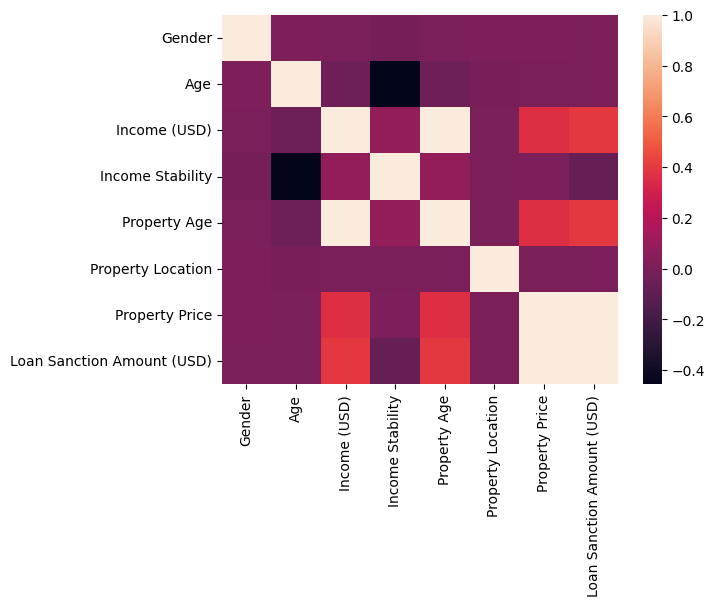

In [15]:
# Heatmap
import seaborn as sns

normalized_data = normalize_data(df.copy())
sns.heatmap(normalized_data.corr())

# Apply machine learning model

## Train-test split

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [17]:
df["Loan Sanction Amount (USD)"]

0         21026.420753
1         60595.183366
2         39181.648002
3        128497.710865
4         39386.919336
             ...      
47292     78800.491330
47293     72483.293359
47294     52462.861498
47295     22909.596763
47296      5941.989388
Name: Loan Sanction Amount (USD), Length: 47251, dtype: float64

In [18]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
def prepare_X_y(df):
    # Split data into X and y. Return two dataframes
    columns = df.columns.tolist()     # Columns name
    columns.remove('Loan Sanction Amount (USD)')           # Remove y label (column charges in this case)
    X = df[columns]# Todo: Select features
    y = df["Loan Sanction Amount (USD)"]# Todo: Select label
    return X, y

X, y = prepare_X_y(normalized_data)


### Scale data về khoảng 0-1 với MinMaxScale vì các feature numerical có range khá cao 
Không scale theo standardization vì các giá trị 0 trong các feature này vẫn có ý nghĩa riêng

In [19]:
normalized_data.describe()

,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
count,47251.000000,47251.000000,47251.000000,47251.000000,47251.000000,47251.000000,4.725100e+04,47251.000000
mean,0.499566,40.005185,2586.498103,0.910986,2586.467247,0.979006,1.350981e+05,46474.467952
std,0.500005,16.086562,1557.676706,0.284767,1557.737980,0.808280,9.459404e+04,32545.590334
min,0.000000,18.000000,372.700000,0.000000,370.700000,0.000000,7.859620e+03,254.586578
25%,0.000000,25.000000,1653.735000,1.000000,1652.820000,0.000000,6.251069e+04,21775.599375
50%,0.000000,40.000000,2245.460000,1.000000,2244.810000,1.000000,1.130936e+05,38818.433721
75%,1.000000,55.000000,3128.610000,1.000000,3128.570000,2.000000,1.819546e+05,62574.719455
max,1.000000,65.000000,54662.750000,1.000000,54647.750000,2.000000,1.077967e+06,366131.165218


In [20]:
minmax_scaler = MinMaxScaler()
X = minmax_scaler.fit_transform(X)

In [21]:
def split_train_test(X, y, train_size=0.7):
    trainX, testX ,trainY, testY = train_test_split(X, y, train_size=train_size, random_state=20)
    print('Training:' + str(trainX.shape))
    print('Test:' + str(testX.shape))

    return trainX, testX ,trainY, testY


In [22]:
TRAIN_SIZE = 0.7

trainX, testX ,trainY, testY = split_train_test(X, y, train_size=TRAIN_SIZE)

Training:(33075, 7)
Test:(14176, 7)


In [23]:
trainX[1:5,]

array([[0.        , 0.        , 0.03447556, 1.        , 0.03448382,
        0.        , 0.05541328],
       [0.        , 0.76595745, 0.04240096, 1.        , 0.04241111,
        0.        , 0.08361561],
       [0.        , 0.46808511, 0.05292811, 1.        , 0.05266443,
        1.        , 0.06231299],
       [0.        , 0.82978723, 0.17183241, 1.        , 0.17183672,
        1.        , 0.16299117]])

## Basic Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet


def build_linear_model(X, y):
    model = LinearRegression(fit_intercept=True)   
    model.fit(trainX, trainY) 

    return model

model = build_linear_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(trainX)   
print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred, y_true=trainY) )
pred = model.predict(testX)   
print("mean absolute error of linear model on test set ", mean_absolute_error(y_pred=pred, y_true=testY) )

print("Coef của LinearRegression  là")

print(model.coef_) # print coefficient
print("intercept của LinearRegression là: ")
print(model.intercept_) # print intercept_


mean absolute error of linear model on train set  134.85265457041763
mean absolute error of linear model on test set  160.91343855069917
Coef của LinearRegression  là
[-2.35945505e+02 -3.71094298e+03  3.00019644e+04 -1.11497599e+04
  2.56902096e+04 -1.22115558e+02  3.59648907e+05]
intercept của LinearRegression là: 
13504.303863996189


In [25]:
from sklearn.linear_model import LinearRegression


def build_lasso_model(X, y):
    model = Lasso(alpha=0.1/1 ,max_iter=10000,fit_intercept=True) # Todo: use sklearn model and config your parameters
    # Todo: fit your model with X, y
    model.fit(trainX, trainY)

    return model

model = build_lasso_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(trainX)   
print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred, y_true=trainY) )
pred = model.predict(testX)   
print("mean absolute error of linear model on test set ", mean_absolute_error(y_pred=pred, y_true=testY) )

print("Coef của Lasso là")

print(model.coef_) # print coefficient
print("intercept của Lasso là ")
print(model.intercept_) # print intercept_


mean absolute error of linear model on train set  134.40707296338064
mean absolute error of linear model on test set  160.4695927700682
Coef của Lasso là
[-2.35602044e+02 -3.70909575e+03  4.65241322e+04 -1.11464126e+04
  9.04296506e+03 -1.21510220e+02  3.59650934e+05]
intercept của Lasso là 
13505.515460710092


In [26]:
from sklearn.linear_model import LinearRegression


def build_ridge_model(X, y):
    model = Ridge(alpha=0.1/1,fit_intercept=True) # Todo: use sklearn model and config your parameters
    # Todo: fit your model with X, y
    model.fit(trainX, trainY)
    return model

model = build_ridge_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(trainX)   
print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred, y_true=trainY) )
pred = model.predict(testX)   
print("mean absolute error of linear model on test set ", mean_absolute_error(y_pred=pred, y_true=testY) )

print("Coef của Ridge là")

print(model.coef_) # print coefficient
print("intercept của Ridge là ")
print(model.intercept_) # print intercept_


mean absolute error of linear model on train set  131.54447048702852
mean absolute error of linear model on test set  157.6911697017725
Coef của Ridge là
[-2.35844567e+02 -3.71061714e+03  2.78774148e+04 -1.11492140e+04
  2.78712919e+04 -1.22069590e+02  3.59503345e+05]
intercept của Ridge là 
13518.500510010112


In [27]:
from sklearn.linear_model import LinearRegression


def build_elastic_model(X, y):
    model = ElasticNet(alpha=0.1/10000 ,l1_ratio=0.5,max_iter=10000,fit_intercept=True)
    # Todo: fit your model with X, y
    model.fit(trainX, trainY)
    return model

model = build_elastic_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(trainX)   
print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred, y_true=trainY) )
pred = model.predict(testX)   
print("mean absolute error of linear model on test set ", mean_absolute_error(y_pred=pred, y_true=testY) )

print("Coef của ElasticNet là")

print(model.coef_) # print coefficient
print("intercept của ElasticNet là ")
print(model.intercept_) # print intercept_


mean absolute error of linear model on train set  131.2129746613895
mean absolute error of linear model on test set  157.40560461397766
Coef của ElasticNet là
[-2.35782880e+02 -3.71039746e+03  2.78930937e+04 -1.11488490e+04
  2.78927600e+04 -1.22042871e+02  3.59408276e+05]
intercept của ElasticNet là 
13527.820320413164


### Cross validation test

In [28]:
%timeit my_variable = 42
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np
trainX, testX ,trainY, testY
# Load the data
data = pd.read_csv('final_house_loan.csv')

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(data.drop('Loan Sanction Amount (USD)', axis=1), 
#                                                    data['Loan Sanction Amount (USD)'], 
#                                                    test_size=0.2, random_state=42)

# Define a function to train and evaluate each model using cross-validation
def train_and_evaluate_model(model, trainX, trainY, cv=5):
    # Train the model using cross-validation
    scores = cross_val_score(model, trainX, trainY, cv=cv, scoring='neg_mean_squared_error')
    # Compute the root mean squared error
    rmse = np.sqrt(-scores.mean())
    # Print the model name and RMSE
    print(f"{type(model).__name__} - RMSE: {rmse:.2f}")
    # Fit the model on the full training set
    model.fit(trainX, trainY)
    # Compute the test set RMSE
    y_pred = model.predict(testX)
    test_rmse = np.sqrt(mean_squared_error(testY, y_pred))
    # Print the test set RMSE
    print(f"Test set RMSE: {test_rmse:.2f}")
    return model

# Train and evaluate each model
lr = train_and_evaluate_model(LinearRegression(), trainX, trainY)
ridge = train_and_evaluate_model(Ridge(alpha=0.1/1), trainX, trainY) #0.0010
lasso = train_and_evaluate_model(Lasso(alpha=0.1/1), trainX, trainY) #0.00001
elasticnet = train_and_evaluate_model(ElasticNet(alpha=0.1/10000 ,l1_ratio=0.5,max_iter=10000,fit_intercept=True), trainX, trainY) #0.00001


7.09 ns ± 0.109 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)
LinearRegression - RMSE: 1255.17
Test set RMSE: 1862.02
Ridge - RMSE: 1255.27
Test set RMSE: 1862.32
Lasso - RMSE: 1255.18
Test set RMSE: 1862.06
ElasticNet - RMSE: 1255.34
Test set RMSE: 1862.56


Linear Regression:

Ưu điểm: Mô hình Hồi quy tuyến tính có RMSE tập huấn luyện thấp nhất, cho thấy đây là một mô hình cơ bản và hiệu quả cho tập dữ liệu này.
Nhược điểm: Tuy nhiên, RMSE tập kiểm tra của nó cao hơn so với các mô hình Ridge, Lasso và ElasticNet, cho thấy nó nhạy cảm hơn đối với hiện tượng quá khớp và không tổng quát hóa tốt cho dữ liệu mới.

Ridge Regression:

Ưu điểm: Mô hình Hồi quy Ridge có RMSE tập huấn luyện cao hơn mô hình Hồi quy tuyến tính một chút, nhưng RMSE tập kiểm tra lại thấp hơn, cho thấy nó tốt hơn trong việc tổng quát hóa dữ liệu mới và ít nhạy cảm hơn đối với hiện tượng quá khớp.
Nhược điểm: Tuy nhiên, mô hình Hồi quy Ridge không thực hiện việc lựa chọn đặc trưng và không thể hoàn toàn loại bỏ các đặc trưng, điều này có thể là một bất lợi nếu có quá nhiều đặc trưng vô nghĩa hoặc trùng lặp trong tập dữ liệu.

Lasso Regression:

Ưu điểm: Mô hình Hồi quy Lasso có RMSE tập kiểm tra cao nhất trong bốn mô hình, nhưng lại có RMSE tập huấn luyện thấp nhất, cho thấy nó rất hiệu quả trong việc giảm hiện tượng quá khớp và lựa chọn đặc trưng bằng cách đặt một số hệ số đặc trưng bằng không.
Nhược điểm: Tuy nhiên, nếu có quá nhiều đặc trưng quan trọng trong tập dữ liệu, mô hình Hồi quy Lasso có thể loại bỏ một số trong số chúng và dẫn đến một mô hình không tối ưu.

ElasticNet Regression:

Ưu điểm: Mô hình Hồi quy ElasticNet kết hợp các ưu điểm của Hồi quy Ridge và Lasso bằng cách sử dụng một sự kết hợp của chế độ điều chuẩn L1 và L2, cho phép nó thực hiện cả việc lựa chọn đặc trưng và thu nhỏ đặc trưng.
Nhược điểm: Tuy nhiên, điều chỉnh các tham số L1 và L2 có thể khá là khó khăn và cần nhiều phép thử cho 1 bộ dữ liệu nhất định

## Polynomial Transform 

When the data feature does not conform to a linear function, a linear regression cannot be applied directly to the original data. Then, there are many possibilities that the data feature conforms to the polynomial function. Scikit-Learn supports converting data features to polynomials through ``PolynomialFeatures``.

$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$

The formula above uses the transformation of the value $x$ from one dimension to the other, with the aim of being able to use linear regression to find complex relationships between $x$ and $y$.

In [29]:
#Linear Regression with Polynomial Transform
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def build_pipeline(X, y):
    poly_model = make_pipeline(PolynomialFeatures(2, include_bias=False), LinearRegression())
    poly_model.fit(X, y)   

    return poly_model
# Compare on training dataset
poly_model = build_pipeline(trainX, trainY)
# Compare on training dataset
poly_pred = poly_model.predict(trainX)   
print("mean absolute error of linear model (with poly transform) on train set ", 
      mean_absolute_error(y_pred=poly_pred, y_true=trainY) )

poly_pred = poly_model.predict(testX)
print("mean absolute error of linear model (with poly transform) on test set ",
      mean_absolute_error(y_pred=poly_pred, y_true=testY))

mean absolute error of linear model (with poly transform) on train set  123.7186378527345
mean absolute error of linear model (with poly transform) on test set  148.73699819782442


In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


degrees = range(1, 8)


# Loop over the degrees and fit the models
test_mse=[]
for degree in degrees:
    poly_model = make_pipeline(PolynomialFeatures(degree, include_bias=False), LinearRegression())
    poly_model.fit(X, y)   

    y_test_pred = poly_model.predict(testX)
    
    test_mse.append(mean_absolute_error(testY, y_test_pred))


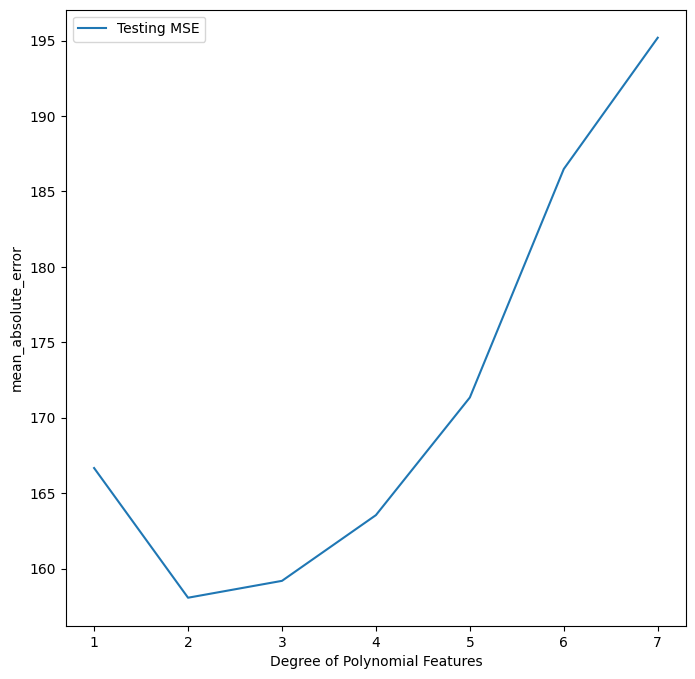

In [31]:
# Plot the metrics as the degree of the polynomial features increases
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(degrees, test_mse, label='Testing MSE')
ax.set_xlabel('Degree of Polynomial Features')
ax.set_ylabel('mean_absolute_error')
ax.legend()

plt.show()

### Có thể thấy khi số parameters càng cao (bắt đầu từ 3) thì mean absolute error bắt đầu từ cực tiểu tăng dần khi parameters càng tăng -> overfitting